# Introduction to Gradient Descent 

In [13]:
%%html
<div align="center">
  <iframe width="600" height="400" 
          src="https://www.youtube.com/embed/5aXk5pppj8U?si=IpPRe973CUGhX6l6" 
          frameborder="0" 
          allowfullscreen>
  </iframe>
</div>

## Gradient Descent

Gradient descent is an iterative, gradient-based optimization method. The concept of gradient descent is simple: update the current position by moving in the direction of the negative gradient. In a word-schematic-equation, gradient descent is:

\begin{equation} 
\text{upadated parameter} = \text{current parameter} + \text{step in the direction of the negative gradient of the objective function}. 
\end{equation} 

The basic gradient descent algorithm is 
\begin{equation} 
x_{n+1} = x_n - \eta \nabla f(x_n),
\end{equation} 
where $ \eta $ is called the learning rate (a term more commonly used in machine learning) or the step size (which is the preferred term for those who like more appropriate naming conventions). The learning rate $\eta $ is a number between 0 and 1, and it controls the step size (which is why those who prefer clarity often call it the step size).

Choosing the learning rate is part art and part science. 

- If $ \eta $ is too small, gradient descent may converge very slowly—it takes a long time to reach the minimum because the steps are too small.
- If $ \eta $ is too large, gradient descent can overshoot the minimum, oscillate around it, or even diverge.

How do we choose a learning rate? Great question! The optimal learning rate is something we'll dive into in a future lecture. For now, let's keep it simple.

---

**Exercise**

In this exercise, we will implement a basic version of gradient descent for simple linear regression. There will be no convergence criteria, no adaptive step size, just a basic iteration, so we can see how it works. 

Simple linear regression is 

\begin{equation} 
y_i = \beta_0 + \beta_1 x_i + \epsilon_i,  
\end{equation} 
where $i$ denotes the $i-th$ data point, $y_i$ are the observed values, $\beta_0$ and $\beta_1$ are the model parameters, $x_i$ are the predictive variables, and $\epsilon_i$ is noise term that is drawn from a normal distribution. 

The loss function is the mean squared error
\begin{equation} 
\begin{split} 
L & = \frac{1}{N}\sum_{i=1}^N ( y_i - \hat{y}_i)^2 \\
& = \frac{1}{N}\sum_{i=1}^N ( y_i - \beta_0 - \beta_1 x_i)^2, 
\end{split} 
\end{equation} 
where $N$ is the number of data samples and $y_i$ are the observed/true values. Gradient descent will require derivatives of the loss function, these can be obtained by pencil and paper methods (do it yourself) or SymPy (see below). 


In [2]:
# some usual libraries to import 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

import sympy as sym 
from scipy.stats import linregress

**SymPy for Derivatives**
In case you forgot how to take the needed derivatives, I provide you with SymPy code to do the job. 

In [3]:
# indicies 
i, N= sym.symbols('i  N', integer=True)

# model parameters 
beta_0, beta_1 = sym.symbols("beta_0 beta_1")

# data
X = sym.IndexedBase('X')
y=sym.IndexedBase(r"\hat{y}")
eps=sym.IndexedBase("epsilon")

In [4]:
model_eqn=sym.Eq(y,X[i]*beta_1 + beta_0 +eps[i])
model_eqn

Eq(\hat{y}, beta_0 + beta_1*X[i] + epsilon[i])

In [5]:
loss=1/N*sym.Sum((y[i]-X[i]*beta_1 - beta_0)**2, (i,1,N))
loss

Sum((-beta_0 - beta_1*X[i] + \hat{y}[i])**2, (i, 1, N))/N

In [6]:
loss.diff(beta_0) 

Sum(2*beta_0 + 2*beta_1*X[i] - 2*\hat{y}[i], (i, 1, N))/N

In [7]:
loss.diff(beta_1) 

Sum(-2*(-beta_0 - beta_1*X[i] + \hat{y}[i])*X[i], (i, 1, N))/N

**Procedure for Simulating Data:**

- Choose $N$, the number of data points.
- Create $x_i$ by randomly drawing from a uniform distribution.
- Choose values for $\beta_0$ and $\beta_1$.
- Simulate $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, where $\epsilon_i$ is drawn from a normal distribution.

---

**Procedure for Bare-Bones Gradient Descent:**

- Set the number of iterations: $n_{\text{iter}} = 600$.
- Set the learning rate: $\eta = 0.01$.
- Set initial parameter values: $\beta_0 = 1$, $\beta_1 = 1$.
- Loop through $i = 1$ to $n_{\text{iter}} + 1$. At each iteration, compute the gradient using the current parameter values.
- At each iteration, update the parameters using the gradient descent rule.

**The Code**

Here is code that exemplifies gradient descent for simple linear regression.

In [9]:
N =100 # number of samples

# simulated data 
np.random.seed(0)  # for reproducibility
X = np.random.uniform(0,10,size=N)  # 100 predicitve variables 
beta_0_true = 4.5
beta_1_true = 3.3

y = beta_0_true + beta_1_true * X + 1.5*np.random.normal(size = X.shape)  

# Define the linear regression model: y_hat = mx + b
def predict(X, beta_0, beta_1):
    return X * beta_1 + beta_0

# Define the cost function (Mean Squared Error)
def loss(X, y, beta_0, beta_1):
    y_hat = predict(X, beta_0, beta_1)
    return np.mean((y_hat - y)**2)

# Define the gradients of the cost function with respect to beta_0 and beta_1
def gradient_beta_1(X, y, beta_0, beta_1):
    y_hat = predict(X, beta_0, beta_1)
    return 2 * np.mean((y_hat - y) * X)

def gradient_beta_0(X, y, beta_0, beta_1):
    y_hat = predict(X, beta_0, beta_1)
    return 2 * np.mean(y_hat - y)

# number of iterations, step size, initial guess for beta_0 and beta_1 
n_iter=600
eta = 0.01
beta_0, beta_1 = 1, 1

# list to keep track of data 
hist=np.zeros((n_iter+1,3))
hist[0,0]=beta_0
hist[0,1]=beta_1
hist[0,2]=loss(X, y, beta_0, beta_1)

for i in range(1,n_iter+1): 

    beta_1 = beta_1 - eta*gradient_beta_1(X, y, beta_0, beta_1) 
    beta_0 = beta_0 - eta*gradient_beta_0(X, y, beta_0, beta_1)

    hist[i,0]=beta_0
    hist[i,1]=beta_1
    hist[i,2]=loss(X, y, beta_0, beta_1)

print(f"Final beta_0: {beta_0:.4f}")
print(f"Final beta_1: {beta_1:.4f}")
print(f"Final loss: {loss(X, y, beta_0, beta_1):.4f}")

Final beta_0: 4.6886
Final beta_1: 3.3130
Final loss: 2.2387


In [10]:
# compare to SciPy 
sol=linregress(X,y) 
print(sol.intercept)
print(sol.slope) 

4.833226616170849
3.290540253210304


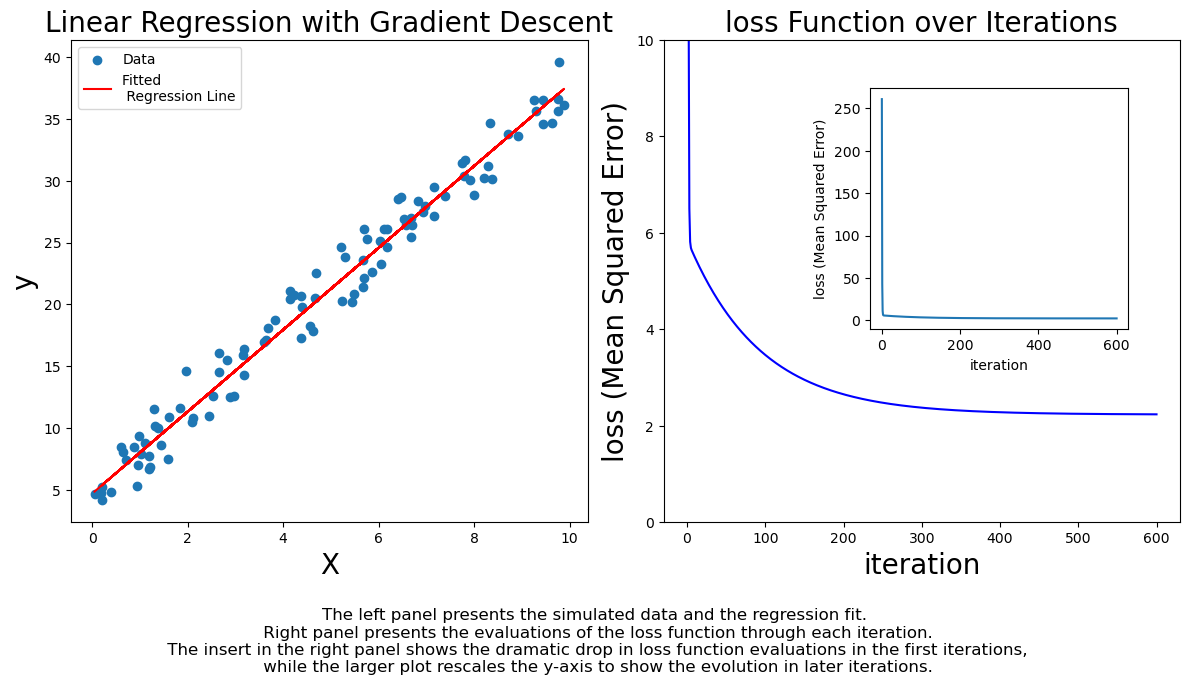

In [11]:
# Visualize the results
fig = plt.figure(figsize=(12, 6))


# Plot the data and the regression line
ax=fig.add_subplot(1, 2, 1)
ax.scatter(X, y, label='Data')
ax.plot(X, predict(X, beta_0, beta_1), color='red', label='Fitted \n Regression Line')
ax.set_xlabel('X', size=20)
ax.set_ylabel('y', size=20)
ax.set_title('Linear Regression with Gradient Descent',size=20)
ax.legend()

# Plot the cost function over iterations
ax=fig.add_subplot(1,2,2)
ax.set_ylim(0,10)
ax.plot(hist[:,2], color='blue')
ax.set_xlabel("iteration", size=20)
ax.set_ylabel('loss (Mean Squared Error)',size=20)
ax.set_title('loss Function over Iterations',size=20)

ins = ax.inset_axes([0.4,0.4,.5,0.5])
ins.plot(hist[:,2])
ins.set_xlabel("iteration", size=10)
ins.set_ylabel('loss (Mean Squared Error)',size=10)

txt="The left panel presents the simulated data and the regression fit.\n Right panel presents the evaluations of the loss function through each iteration.\n \
The insert in the right panel shows the dramatic drop in loss function evaluations in the first iterations,\n \
while the larger plot rescales the y-axis to show the evolution in later iterations." 
plt.figtext(0.5, -.125, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()  
